In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys
sys.path.append('../')
from frameworks.CPLELearning import CPLELearningModel

In [3]:
import pandas as pd
import sklearn
from xgboost import XGBClassifier

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
DF_data = pd.read_csv("../data/creditcard.csv")
DF_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
y = DF_data['Class']
X = DF_data.drop(['Class', 'Time'], axis=1).values

In [15]:
from sklearn.model_selection import train_test_split


seed = 44
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=False)

In [16]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]

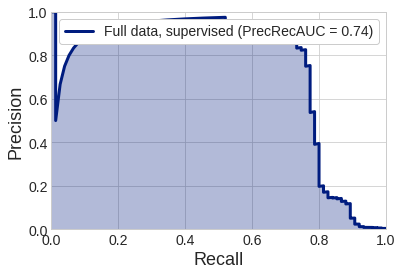

In [17]:
%matplotlib inline
from utils import plot_prec_rec_curve


plot_prec_rec_curve(y_test, y_pred, 'Supervised (on test)')

In [25]:
unlab_frac = 0.5
X_train, X_unlab, y_train, y_unlab = train_test_split(X_train, y_train, test_size=unlab_frac, random_state=seed, shuffle=False)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]

plot_prec_rec_curve(y_test, y_pred, 'Supervised (on test)')

nlopt invalid argument


/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


XGBoostError: [10:40:33] src/objective/regression_obj.cc:90: Check failed: (preds.size()) == (info.labels.size()) labels are not correctly providedpreds.size=56961, label.size=170884

In [ ]:
y_unlab_pred = model.predict_proba(X_unlab)[:, 1]

plot_prec_rec_curve(y_unlab, y_unlab_pred, 'Supervised (on unlab)')

In [20]:
%%time

X_combined = pd.np.r_[X_train, X_unlab]
y_combined = pd.np.r_[y_train, y_unlab.replace([0, 1], -1)]

model = CPLELearningModel(XGBClassifier(), predict_from_probabilities=True, max_iter=10)
model.fit(X_combined, y_combined.astype(int))

 max_iter exceeded.
CPU times: user 27min 30s, sys: 4.76 s, total: 27min 35s
Wall time: 8min 11s


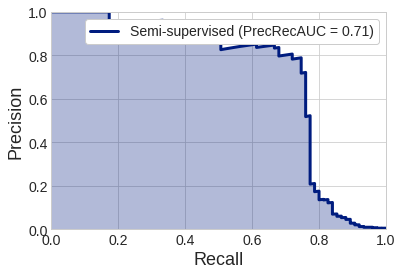

In [22]:
y_pred = model.predict_proba(X_test)[:, 1]

plot_prec_rec_curve(y_test, y_pred, 'Semi-supervised')

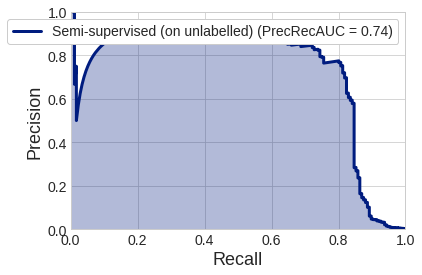

In [23]:
y_unlab_pred = model.predict_proba(X_unlab)[:, 1]

plot_prec_rec_curve(y_unlab, y_unlab_pred, 'Semi-supervised (on unlabelled)')